In [11]:
import pandas as pd
from pandas import read_csv

In [5]:
fileName = "METERENERGY.CSV"
names = ['Voltage', 'Current', 'Power', 'Meter']
dataset = read_csv(fileName, names=names, dtype={'col2': str}, low_memory=False)

In [7]:
print(dataset.shape)
print(dataset.head(20))
print(dataset.describe())
print(dataset.groupby('Meter').size())

(1032685, 4)
    Voltage  Current  Power Meter
0    251.26     0.15  49.97  BR02
1    251.23     0.15  49.94  BR01
2    251.55     0.14  49.94  BR01
3    251.97     0.14  50.09  BR01
4    252.03     0.14  50.08  BR01
5    251.78     0.14     50  BR01
6    251.75     0.13  49.97  BR01
7    251.95     0.14     50  BR01
8    251.81     0.14  49.96  BR02
9    252.05     0.13      M  BR02
10   252.15     0.14     50  BR02
11   252.10     0.13  49.98  BR02
12   252.31     0.13     50  BR02
13   252.57     0.12  50.02  BR02
14   252.74     0.13  50.04  BR02
15   252.84     0.12  50.05  BR02
16   252.78     0.13  50.04  BR02
17   253.00     0.13     50  BR02
18   253.29     0.12     50  BR02
19   253.40     0.14  49.98  BR02
            Voltage       Current
count  1.016800e+06  1.016800e+06
mean   2.345385e+02  1.628771e+00
std    4.872227e+01  2.021643e+00
min    0.000000e+00  0.000000e+00
25%    2.372600e+02  4.100000e-01
50%    2.452700e+02  9.600000e-01
75%    2.513400e+02  1.930000e+00
m

In [5]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

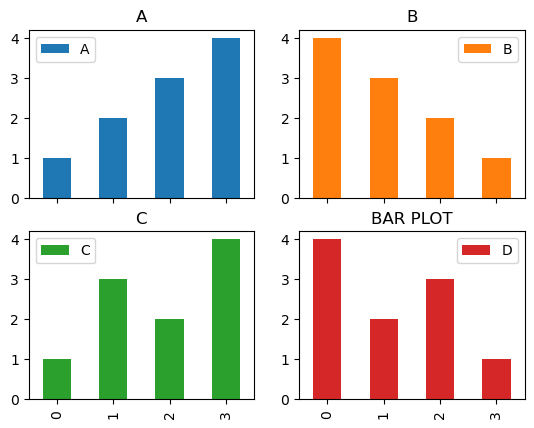

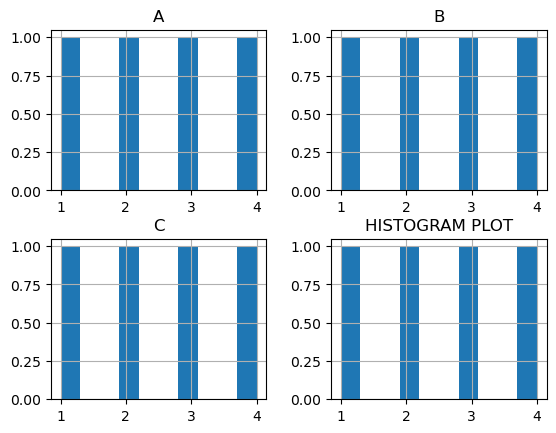

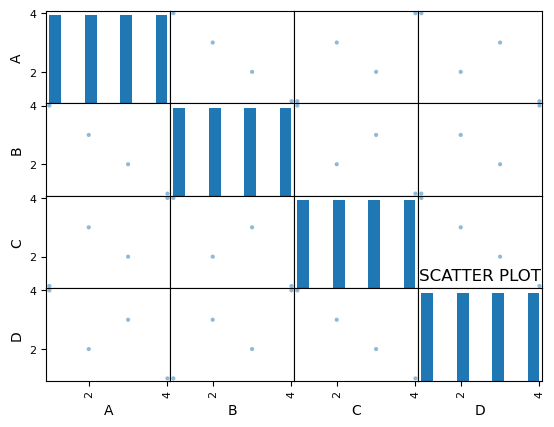

In [15]:

dataset = pd.DataFrame(data)

dataset.plot(kind='bar',subplots=True,layout=(2,2))
pyplot.title('BAR PLOT')
pyplot.show()

dataset.hist()
pyplot.title('HISTOGRAM PLOT')
pyplot.show()

scatter_matrix(dataset)
pyplot.title('SCATTER PLOT')
pyplot.show()

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


In [31]:
array = dataset.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [33]:
models =[]
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.083333 (0.117851)
LDA: 0.111111 (0.157135)
KNN: 0.111111 (0.157135)
CART: 0.083333 (0.117851)
NB: 0.083333 (0.117851)
SVM: 0.222222 (0.157135)


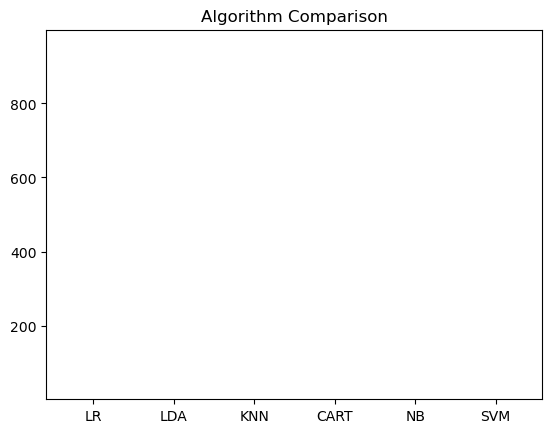

In [49]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as pyplot

X_train = np.random.rand(10, 2)  
y_train = [0,1,0,1,0,1,1,0,1,0]
results = []
names = []
res = []
for name, model in models:
    min_class_samples = min([list(y_train).count(cls) for cls in set(y_train)]) 
    n_splits = min(3, min_class_samples) 
    kfold = StratifiedKFold(n_splits=n_splits, random_state=None)  
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')  
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

pyplot.ylim(.990, 999)
pyplot.bar(names, res, color = 'maroon', width = 0.6)

pyplot.title('Algorithm Comparison')
pyplot.show()
    




